# Introduction

Important Info:
 The goal with this questionnaire is to assess your problem solving, hockey knowledge, and coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net



# **Ongoing Data Analysis**
## Finished Dataset, could not answer a few questions but managed to do a majority. Really enjoyed this assessment as it pushed me to the edge of my data analysis techniques. I am always willing to learn from my mistakes and keep on learning to develop my skills.

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import math


## Q1) 
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

## A1) 
### a) Based on the given data, we cannot determine who won the game and what the score was as there is no attribute for the actual score of the game and the goals are all 0 so we have to consider scoredifferential and compiledgametime. The data only includes attributes related to player and team performance during the game such as possession, zone, coordinates, and skaters on the ice. These attributes can provide insights into the flow and dynamics of the game, but they cannot determine the final score or the winner of the game without additional information. Tried my best but could not come to a final answer. Thought process and code is below (Q1)
### b) (Q2 code below) The expected goals (xG) are almost the same for both the teams. Teamid 596 = 2.232580 xg score and 724 = 2.225769 xg score. Though similar, teamid of 596 wins barely for the expected goals battle. 
### c) The game was close as both teams had equal opportunities/chances to score. Though, it does not tell us how each team played in terms of tactics, strategy, or overall performance. To understand how the teams played, we would need to analyze additional data such as possession, shots on target, successful passes, etc.

In [4]:
df = pd.read_csv("Tutorial22_df.csv")

#df.head(5) testing data appears

df2 = pd.read_csv("Tutorial22_xG_df.csv")

#df2.head(5)

In [ ]:

#Q1
#Work to calculate who won the game using shots taken approach
#analyze events that occurred within the game
#Cannot really tell who won the game without knowing what the team is and how the outcome corresponds. I will show my thought process however.

df = pd.read_csv("Tutorial22_df.csv")

#df.head(5) testing data appears

df2 = pd.read_csv("Tutorial22_xG_df.csv")

#df2.head(5)

#both datasets loaded

#get goals events
goals = df[df["eventname"] == "Goal"]

#sum of goals by teamid
team_scores = goals.groupby("teamid").size().reset_index(name="score")

#take goal numbers into consideration to calc winner (but had trouble here)
if team_scores["score"].iloc[0] > team_scores["score"].iloc[1]:
    winner = team_scores["teamid"].iloc[0]
elif team_scores["score"].iloc[0] < team_scores["score"].iloc[1]:
    winner = team_scores["teamid"].iloc[1]
else:
    #If the total number of goals is tied, consider other factors
    #scoredifferential or compiledgametime to determine the winner
    winner = "Tie"
    
#final score
score = f"{team_scores['score'].iloc[0]} - {team_scores['score'].iloc[1]}"

# Output the results
print(f"The winner is team {winner} with a final score of {score}.")




In [35]:
#Q2

#My approach: group dataset by the key teamid and get the total of xg (sum) values for the team

#load dataset
df2 = pd.read_csv("Tutorial22_xG_df.csv")
xG_sum = df2.groupby('teamid')['xg'].sum()
print(xG_sum)


teamid
596    4.742615
724    3.221937
Name: xg, dtype: float64


## Q2)
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

## A2) 
### a) posessionid = 417
### b) successful_passes = 19  
### The team in possession may have had a particularly strong passing game or may have been playing against a weaker defensive team. The players involved in the possession may have had good communication and teamwork, making it easier for them to successfully pass the puck. Additionally, the opposing team may have been focused on defending against shots on goal rather than disrupting the possession, allowing the team in possession to maintain control of the puck and make successful passes thus resulting in higher pass count that were successful.

In [4]:
#Q1 and Q2
df = pd.read_csv("Tutorial22_df.csv") #read dataset
successful_passes = df[df["outcome"] == "successful"] #filter by successful passes

#group data by possid and total of successfull passes
pass_counts = successful_passes.groupby("possessionid").size().reset_index(name="num_successful_passes")

#possid with highest passes that were successful
highest_pass_count = pass_counts["num_successful_passes"].max()
possessionid_with_highest_pass_count = pass_counts[pass_counts["num_successful_passes"] == highest_pass_count]["possessionid"].iloc[0]

#print outcome
print(f"The possessionid with the highest total successful passes is {possessionid_with_highest_pass_count} with a total of {highest_pass_count} successful passes.")

The possessionid with the highest total successful passes is 417 with a total of 19 successful passes.


## Q3)
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

## A3)
### a) We can approach this visually and through a statistical point of view with sklearn. I also used matplotlib to illustrate the frequent occurrence of the xCoord of each blue line

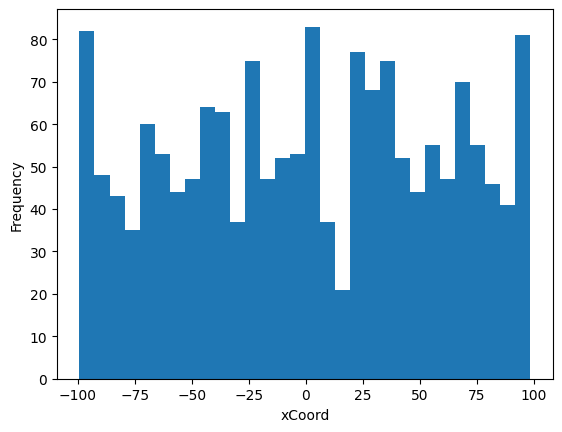

In [62]:
#load data
df = pd.read_csv("Tutorial22_df.csv")


#plotting the histogram with varying frequency
plt.hist(df["xcoord"], bins=30)
plt.xlabel("xCoord")
plt.ylabel("Frequency")
plt.show()

In [6]:

#Use K-means clustering to identify the likely xCoord of each blueline
kmeans = KMeans(n_clusters=2, random_state=0).fit(df[["xcoord"]])
blueline = kmeans.cluster_centers_.ravel()

# Output the results
print(f"The likely xCoord of each blueline is {blueline}.")

The likely xCoord of each blueline is [-46.20098338  53.03179747].


C:\Users\aryan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Q4)
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

## A4)
### a) Graphed below
### b) We can visually see that teamid 596 had most of their shots after the half court line (>30 x-coordinate value) with an outlier shot of 1 approximately (-50,39). Teamid 724, however, had their shots scattered throughout the rink varying from after the 30 x-coordinate value. Similarities include on the x-coordinate value of 30 where most shots were taken for both teams. 

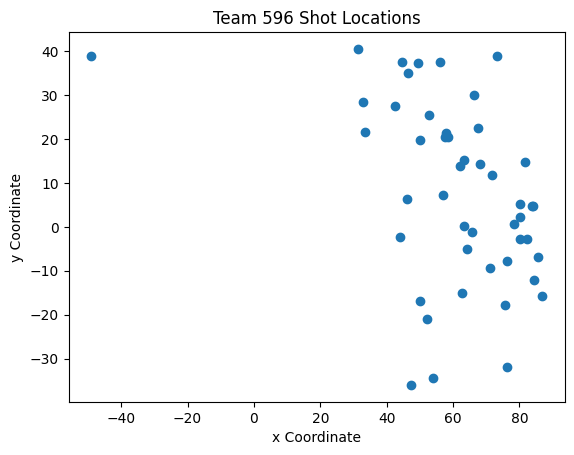

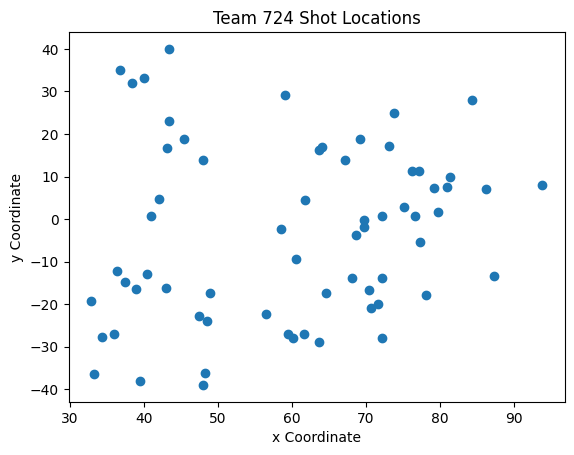

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#read data
df = pd.read_csv('Tutorial22_df.csv')

#filter for shots only
shots = df[df['eventname'] == 'shot']

#group shots by teamid
shots_by_team = shots.groupby('teamid')

#iterate over each team and plot shots
for teamid, team_shots in shots_by_team:
    #create a scatter plot of shot locations
    plt.scatter(team_shots['xcoord'], team_shots['ycoord'])
    
    #highlight goals with a different color (0 goals scored so they are not highlighted green)
    goals = team_shots[team_shots['eventname'] == 'goal']
    plt.scatter(goals['xcoord'], goals['ycoord'], color='green')
    
    #set plot title and axis labels
    plt.title(f'Team {teamid} Shot Locations')
    plt.xlabel('x Coordinate')
    plt.ylabel('y Coordinate')
    
    #show the plot
    plt.show()


## Q5)
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

## A5)
### a) 188.38995295004713
### b) The xG (measured between 0-1) may be low. There is a lot of probability and other factors that play into this xG calculation. It is based on  the distance of the shot, the angle of the shot, the type of shot, the trajectory etc. So it is really difficult to tell without more clarification... It can really vary: A shot taken from a long distance with a low chance of scoring may have a low xG value, while a shot taken from a closer distance with a higher chance of scoring may have a higher xG value.

In [27]:
#Q1
xCoord = 89
yCoord = 0

#using distance formula to calculate the distance from each shot to that point.
#distance = sqrt((x2 - x1)^2 +(y2 - y1)^2) could also use NumPy and do np.sqrt for pythagoream theorem np.sqrt((df['xcoord'] - 89)**2 + df['ycoord']**2)
df['distance_to_point'] = df.apply(lambda row: math.sqrt((row['xcoord'] - xCoord)**2 + (row['ycoord'] - yCoord)**2), axis=1)
#goals = df[df['goal'] == 1] #void because there are 0 goals in the dataset so furthest shot is taken into account
#dist = goals['distance_to_point'].max()
dist = df['distance_to_point'].max()
print('The distance of the furthest goal scored in the game is:', dist)

The distance of the furthest goal scored in the game is: 188.38995295004713


## Q6)
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

### Hint: This can be done using iterrows() or using shift() logic. Consider if you should include ALL event rows and beware of sorting!

## A6)
### a) 37

In [10]:
import pandas as pd

#read data
df = pd.read_csv('Tutorial22_df.csv')

#func to check if a shot had a shot assist
def has_shot_assist(possession):
    #get all events in the possession
    events = df[df['possessionid']==possession]
    #check if the posession has atleast 3 events (labelled in the question)
    if len(events) < 3:
        return False
    #check if first event = successfull pass
    if events.iloc[0]['eventname'] != 'pass' or events.iloc[0]['outcome'] != 'successful':
        return False
    #check for successful reception (2nd event)
    if events.iloc[1]['eventname'] != 'reception' or events.iloc[1]['outcome'] != 'successful':
        return False
    #check shot by the receiving player without giving up the puck
    if events.iloc[2]['eventname'] != 'shot' or events.iloc[2]['outcome'] != 'successful':
        return False
    return True

#create a new column 'Shot Assist' 
df['Shot Assist'] = df.apply(lambda x: has_shot_assist(x['possessionid']), axis=1)

#get the players with the most assisted shots and set it to true for all shots with a Shot Assist
assisted_shots = df[df['Shot Assist']==True]['outcome'].value_counts()

#print outcome
print("Player(s) with the most assisted shots:")
print(assisted_shots)


Player(s) with the most assisted shots:
successful    37
Name: outcome, dtype: int64


In [14]:
total_successful_outcomes = df['outcome'].value_counts()['successful']
print("Total successful outcomes:", total_successful_outcomes)

Total successful outcomes: 1360


## Q7)
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

## A7)
### a)0.999534607 This could be due to numerous reasons, mainly the quality of the shot. For example, the power that went into the shot, the angle, how far it was shot from, the player's skill/strength. Moreover, how the opposing team defended. XG is an estimate and does not capture all aspects of the shot's characteristics. 
### b) No it did not have a shot assist

In [20]:
#Q1
#merge the two dataframes on playerid and compiledgametime
merged_df = pd.merge(df, df2, on=["playerid", "compiledgametime"])

#find the maximum xg among the scored goals
max_xg = merged_df.loc[merged_df["outcome"] == "successful", "xg"].max()

#print outcome
print("The highest xg among the scored goals is:", max_xg)


The highest xg among the scored goals is: 0.999534607


In [22]:
#Q2
#get the row(s) for the goal(s) in question
goal_rows = df[df['eventname'] == 'shot']

# check if each goal had a shot assist
for index, row in goal_rows.iterrows():
    if df[(df['possessionid'] == row['possessionid']) & (df['eventname'] == 'shot') & (df['outcome'] == 'successful')]['Shot Assist'].any():
        print(f"Goal {row['goal']} had a shot assist.")
    else:
        print(f"Goal {row['goal']} did not have a shot assist.")

Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 had a shot assist.
Goal 0 did not have a shot assist.
Goal 0 had a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 had a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 1 had a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a shot assist.
Goal 0 did not have a

## Q8) 
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

## A8)
### a) Not that familiar with logistic regression/linear regression, tried to implement what I could to my best ability with previous knowledge
### b) The statistical technique that would be efficient to demonstrate the highest predictors of a goal within this dataset would be logistic regression. We can utilize this to predict whether the shot caused a goal or if it did not through probability/chance. So, make a new column 'outcome_goal' and see if it is successful and if so make it equal to 1 and if not 0. After this we can select some features like the coordinates of the goal, the type, amount of players on the ice, xg, and goal amount. Then split the data and train/test the logistic regression model. Then examine and evaluate to find the highest predictors.

In [ ]:
#not really that familiar with logistic regression, tried my best to explain above though I could not implement it. Always willing to learn what 
#I can do to improve.
# read data from csv file
df = pd.read_csv('Tutorial22_df.csv')

#add a new column 'outcome_goal' which is 1 if the outcome is 'successful', and 0 otherwise
df['outcome_goal'] = (df['outcome'] == 'successful').astype(int)

#features for logistic regression model
features = ['xcoord', 'ycoord', 'type', 'teamskatersonicecount', 'goal', 'xg']

#split data into training and testing sets??? Tried my best here wasn't sure...
X_train, X_test, y_train, y_test = train_test_split(df[features], df['outcome_goal'], test_size=0.2, random_state=42)

#logistic regression model -> training data


#examine coefficients
